# Data Description
1. List_of_Station_Chicago.csv scraped from Wikipedia 
2. use *opencage.geocoder* to get lat, lng
3. "station.csv" is the cleaned combining 1 and 2 
4. Using Foursquare API to get Get top categories , category.csv contains three tiers of category for analysis

In [345]:
# !pip install sklearn
import pandas as pd
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ipywidgets as widgets
widgets.IntSlider()


IntSlider(value=0)

### List of stations and geographical coordinates


Data downloaded from wikipedia
https://en.wikipedia.org/wiki/List_of_Chicago_%22L%22_stations

In [346]:
stations=pd.read_csv("List_of_Station_Chicago.csv")
stations.head()

Station Lines                           Transfers        Location  \
0          O'Hare  Blue  O'Hare: ATS Airport Transit System          O'Hare   
1        Rosemont  Blue                                   —        Rosemont   
2      Cumberland  Blue                                   —          O'Hare   
3          Harlem  Blue                                   —    Norwood Park   
4  Jefferson Park  Blue                        Metra: UP-NW  Jefferson Park   

                  Opened          Structure  
0  September 3, 1984[12]        Underground  
1  February 27, 1983[13]  Expressway median  
2  February 27, 1983[13]  Expressway median  
3  February 27, 1983[13]  Expressway median  
4   February 1, 1970[14]  Expressway median

In [347]:
stations.Lines.value_counts()

Blue                              33
Red                               29
Green                             22
Brown                             11
Pink                              11
Purple                             8
Orange                             7
Brown Purple                       6
Brown Orange Pink Purple           4
Brown Green Orange Pink Purple     4
Green Pink                         3
Yellow                             2
Brown Purple Red                   2
Red Purple                         1
Red Purple  Yellow                 1
Green Orange                       1
Name: Lines, dtype: int64

In [348]:
# !pip3 install opencage
# use alternative geocoder for getting lat lng 
from opencage.geocoder import OpenCageGeocode
key = '20b19d9ca52c4af8b4ee86a53b693aa6'
geocoder = OpenCageGeocode(key)

In [349]:
# station_dict={}
# import time
# start = time.time()

# for i, j in zip(stations.Station, stations.Location):
#     address = j + ', ' + 'Chicago, Illinois,United States'
#     location = geocoder.geocode(address)
#     latlng = location[0]['geometry']
#     station_dict[i]=latlng
#     print(i,latlng,str(time.time()-start)+'s')
# station_dict

In [350]:
# latlng=pd.DataFrame.from_dict(station_dict,orient='index').reset_index()
# latlng.columns=['Station','latitude','longitude']
# station_new=pd.merge(stations,latlng,how='left', on=['Station'])
# station_new

In [351]:
# station_new.to_csv('station_latlng.csv')

In [352]:
station_new=pd.read_csv('station_latlng.csv', index_col=0)  # save data
station_new.head()

Station Lines                           Transfers        Location  \
0          O'Hare  Blue  O'Hare: ATS Airport Transit System          O'Hare   
1        Rosemont  Blue                                   —        Rosemont   
2      Cumberland  Blue                                   —          O'Hare   
3          Harlem  Blue                                   —    Norwood Park   
4  Jefferson Park  Blue                        Metra: UP-NW  Jefferson Park   

                  Opened          Structure   latitude  longitude  
0  September 3, 1984[12]        Underground  41.973101 -87.906768  
1  February 27, 1983[13]  Expressway median  41.995343 -87.733745  
2  February 27, 1983[13]  Expressway median  41.973101 -87.906768  
3  February 27, 1983[13]  Expressway median  41.727329 -87.616704  
4   February 1, 1970[14]  Expressway median  41.969738 -87.763118

Neighbourhood df download from wiki
https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago

In [353]:
neighbours = pd.read_csv('List_of_neighborhoods_in_Chicago.csv')
neighbours.head()

FileNotFoundError: [Errno 2] File b'List_of_neighborhoods_in_Chicago.csv' does not exist: b'List_of_neighborhoods_in_Chicago.csv'

In [ ]:
# neig_dict={}
# import time
# start = time.time()

# for i in neighbours.Neighborhood:
#     address = i + ', ' + 'Chicago, Illinois,United States'
#     location = geocoder.geocode(address)
#     latlng = location[0]['geometry']
#     neig_dict[i]=latlng
#     print(i,latlng,str(time.time()-start)+'s')
# neig_dict

In [ ]:
# latlng=pd.DataFrame.from_dict(neig_dict,orient='index').reset_index()
# latlng.columns=['Neighborhood','latitude','longitude']

In [ ]:
# neighbours_new=pd.merge(neighbours,latlng,how='left', on=['Neighborhood'])

In [ ]:
neighbours_new.head()

In [ ]:
# station_new.to_csv("station.csv")
# neighbours_new.to_csv("neighbours.csv")
# reading saved data
station_new = pd.read_csv("station.csv")
neighbours_new = pd.read_csv("neighbours.csv")

In [ ]:
neighbours_new.shape

In [ ]:
# CLIENT_ID="1QWBEEEJMMQ1TD2ZOOO31GHSEWRJ24N3Y40EHQR2ZEH0PI4A"  # confidential
# CLIENT_SECRET="KXTQUUEMPXA1XCMWSEPJ1PN05PCHU0NYNFBHR51LCRA5V3JD" # confidential
VERSION="20191222"
# CLIENT_ID = 'WGY32GYMOR10DO0A4VJZ3YDJML5H4PFBONGBH0SNCCNF2QR0'  # confidential
# CLIENT_SECRET= 'LIUOD1RYNQI5QA1AVDK302Z5ENCRIBZNAMY2GYHORMV1RWAB' # confidential
LIMIT=80

In [ ]:
#create map of Chicago with all neighbourhood
# 41.8781° N, 87.6298° W
map_chicago_neig = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
#add markers
for neighborhood, lat, lng in zip(neighbours_new['Neighborhood'], neighbours_new['latitude'],neighbours_new['longitude']):
    folium.Circle(
        [lat,lng],
        popup=neighborhood,
        radius=20,
        color='red'
    ).add_to(map_chicago_neig)  
map_chicago_neig

In [ ]:
#create map of Chicago with all station
# 41.8781° N, 87.6298° W
map_chicago_station = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
#add markers
for station, lat, lng in zip(station_new['Station'], station_new['latitude'],station_new['longitude']):
    folium.Circle(
        [lat,lng],
        popup=station,
        radius=20,
        color='blue'
    ).add_to(map_chicago_station)  
map_chicago_station

### Methodology
Using Foursquare API to get Get top categories and explore

In [ ]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url,timeout=10).json()

In [ ]:
len(results['response']['categories'])

In [ ]:
categories_list = []
# print the top 5 categories and their IDs and add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)
categories_list = categories_list[:5]

In [ ]:
categories_list

In [ ]:
def get_venues_count(coord, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                coord,
                radius,
                categoryId)
    return requests.get(explore_url, timeout=10).json()['response']['totalResults']


In [ ]:
#Create new dataframe to store venues data
station_venues_df = station_new.copy()
for c in categories_list:
    station_venues_df[c[0]] = 0

station_venues_df.head()

In [ ]:
# #Request number of venues, store result as CSV
# import time
# for i, row in station_venues_df.iterrows():
#         try:
#             for c in categories_list: 
#                 coord = str(station_venues_df.latitude.iloc[i])+","+ str(station_venues_df.longitude.iloc[i])
#                 station_venues_df.loc[i, c[0]] = get_venues_count(coord, radius=1000, categoryId=c[1])
#                 print(c, station_venues_df.loc[i, c[0]])
#                 station_venues_df.to_csv('station_venues.csv')
#         except:
#             print("Connection refused by the server..")
#             print("Let me sleep for 5 seconds")
#             print("ZZzzzz...")
#             time.sleep(100)
#             print("Was a nice sleep, now let me continue...")
#             continue

In [ ]:
station_venues_df = pd.read_csv('station_venues.csv')
station_venues_df = station_venues_df.drop(['Opened','Transfers',
                        'Outdoors & Recreation',
                        'Professional & Other Places',
                        'Residence','Shop & Service',
                        'Travel & Transport'
                       ], axis =1)

Find lication and station with the largest number of "Arts & Entertainment"

In [ ]:
station_venues_df[station_venues_df['Arts & Entertainment'] == max(station_venues_df['Arts & Entertainment'])]

We can see *The Loop* has most of the Arts & Entertainment, then find the top location for the rest categories

In [ ]:
station_venues_df[station_venues_df['College & University'] == max(station_venues_df['College & University'])]

We can see *The Loop* has most of the College & University

In [ ]:
station_venues_df[station_venues_df['Event'] == max(station_venues_df['Event'])]

In [ ]:
station_venues_df[station_venues_df['Food'] == max(station_venues_df['Food'])]

In [ ]:
station_venues_df[station_venues_df['Nightlife Spot'] == max(station_venues_df['Nightlife Spot'])]

It is very obvious that *The Loop* has the most venues in Arts & Entertainment, College & University and Event, which indicate that this location might be the city culture center. Almost all line has a sation that lead to * The Loop*. While West Loop has the most choice of food and Nightlife Spot.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = station_venues_df.values[:,6:]
X

cluster_dataset = MinMaxScaler().fit_transform(X)
cluster_dataset

In [ ]:
cluster_df = pd.DataFrame(cluster_dataset)
cluster_df.columns = [c[0] for c in categories_list]
cluster_df.head()

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot

ax = sns.boxplot(data = cluster_df)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
# set number of clusters
# kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

kmeans_labels = kmeans.labels_
# Change label numbers so they go from highest scores to lowest
replace_labels = {0:2, 1:0, 2:3, 3:1}
for i in range(len(kmeans_labels)):
    kmeans_labels[i] = replace_labels[kmeans_labels[i]]

stations_clusters_df = station_venues_df.copy()
stations_clusters_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df = cluster_df.copy()
stations_clusters_minmax_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df['Station'] = station_new['Station']

In [ ]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

In [ ]:
###### get the data of all categories to define if it's a food venue
# url_cate= url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
#     CLIENT_ID, 
#     CLIENT_SECRET, 
#     VERSION)
# res_cate = requests.get(url_cate).json()

# cdict=[]
# ddict=[]
# for level1 in res_cate['response']['categories']:
#     for level2 in level1['categories']:
#         cdict.append([level1['name'],level2['name']])
#         if len(level2['categories'])>0:
#             for level3 in level2['categories']:
#                 ddict.append([level2['name'],level3['name']])
                
# cdf=pd.DataFrame(cdict,columns=['level1','level2'])
# ddf=pd.DataFrame(ddict,columns=['level2','level3'])
# catedf=pd.merge(cdf,ddf,on='level2',how='outer')
# catedf.to_csv('category.csv')

In [ ]:
catedf= pd.read_csv('category.csv', index_col=0)
catedf

In [ ]:
###### get Nearby Venues
def getNearbyVenues(names, latitudes, longitudes, radius=2000,Limit=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'], 
            v['venue']['location']['lat'], v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 'Neighborhood Latitude', 'Neighborhood Longitude', 
                  'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return(nearby_venues)

In [ ]:
chicago_venues = getNearbyVenues(names=station_new['Station'],latitudes=station_new['latitude'],longitudes=station_new['longitude'])
print(chicago_venues.shape)
chicago_venues.head()

In [451]:
# chicago_venues.to_csv('chicago_venues')
chicago_venues = pd.read_csv('chicago_venues.csv',index_col=0)
chicago_venues.head()

Station  Neighborhood Latitude  Neighborhood Longitude  \
0  O'Hare              41.973101              -87.906768   
1  O'Hare              41.973101              -87.906768   
2  O'Hare              41.973101              -87.906768   
3  O'Hare              41.973101              -87.906768   
4  O'Hare              41.973101              -87.906768   

                               Venue  Venue Latitude  Venue Longitude  \
0              Garrett Popcorn Shops       41.976047       -87.902024   
1  American Airlines Flagship Lounge       41.974533       -87.899623   
2    Tortas Frontera by Rick Bayless       41.975421       -87.900147   
3                           Argo Tea       41.975817       -87.902590   
4                   O'Hare Yoga Room       41.975487       -87.903245   

       Venue Category  
0         Snack Place  
1      Airport Lounge  
2  Mexican Restaurant  
3            Tea Room  
4         Yoga Studio

In [478]:
# replace Venue Category with level2 category 
chicago_venues1 = pd.merge(chicago_venues, 
                  catedf[['level2', 'level3']],
                  left_on='Venue Category',
                  right_on='level3',
                  how='left')
chicago_venues1.loc[chicago_venues1['level2'].isna(),'level2']=chicago_venues1['Venue Category']
chicago_venues1=chicago_venues1.drop(columns=['level3'])
chicago_venues1=chicago_venues1.rename(columns={
    'Venue Category':'Venue Category_temp',
    'level2':'Venue Category'
})
chicago_venues1 = chicago_venues1.drop_duplicates(keep=False)
chicago_venues1.head()

Station  Neighborhood Latitude  Neighborhood Longitude  \
0  O'Hare              41.973101              -87.906768   
1  O'Hare              41.973101              -87.906768   
2  O'Hare              41.973101              -87.906768   
3  O'Hare              41.973101              -87.906768   
4  O'Hare              41.973101              -87.906768   

                               Venue  Venue Latitude  Venue Longitude  \
0              Garrett Popcorn Shops       41.976047       -87.902024   
1  American Airlines Flagship Lounge       41.974533       -87.899623   
2    Tortas Frontera by Rick Bayless       41.975421       -87.900147   
3                           Argo Tea       41.975817       -87.902590   
4                   O'Hare Yoga Room       41.975487       -87.903245   

  Venue Category_temp      Venue Category  
0         Snack Place         Snack Place  
1      Airport Lounge             Airport  
2  Mexican Restaurant  Mexican Restaurant  
3            Tea Room            Tea Room  
4         Yoga Studio         Yoga Studio

In [479]:
###### filter the different venue category to remain only 2nd level categories
chicago_venues1=pd.merge(chicago_venues1,catedf[['level1', 'level2']],
         left_on='Venue Category',
                  right_on='level2',
                  how='left')
chicago_venues2=chicago_venues1.drop(columns=['level1','level2','Venue Category_temp'])
chicago_venues2=chicago_venues2.drop_duplicates(keep=False)

In [480]:
chicago_venues2.shape

(4289, 7)

In [481]:
chicago_venues2.head()
# (4289, 7)

Station  Neighborhood Latitude  Neighborhood Longitude  \
0   O'Hare              41.973101              -87.906768   
14  O'Hare              41.973101              -87.906768   
15  O'Hare              41.973101              -87.906768   
16  O'Hare              41.973101              -87.906768   
22  O'Hare              41.973101              -87.906768   

                    Venue  Venue Latitude  Venue Longitude  Venue Category  
0   Garrett Popcorn Shops       41.976047       -87.902024     Snack Place  
14               Argo Tea       41.975817       -87.902590        Tea Room  
15       O'Hare Yoga Room       41.975487       -87.903245     Yoga Studio  
16  Garrett Popcorn Shops       41.978830       -87.906890     Snack Place  
22   Vosges Haut Chocolat       41.975431       -87.900601  Chocolate Shop

In [482]:
chicago_venues2.groupby("Venue Category")['Venue'].count().nlargest(30)

Venue Category
Coffee Shop                      279
Pizza Place                      217
Park                             211
American Restaurant              191
Sandwich Place                   183
Bakery                           118
Café                             107
Fast Food Restaurant             103
Breakfast Spot                    95
Seafood Restaurant                87
Sushi Restaurant                  84
Donut Shop                        82
Gym                               80
Fried Chicken Joint               73
Discount Store                    69
Lounge                            62
Brewery                           60
Diner                             59
Burger Joint                      58
Art Gallery                       56
Bookstore                         56
Restaurant                        56
Caribbean Restaurant              46
Gastropub                         46
Yoga Studio                       46
Hot Dog Joint                     45
Spa                    

In [483]:
map_chicago = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# add markers to map
for lat, lng, station,venue in zip(chicago_venues2['Venue Latitude'], 
                                           chicago_venues2['Venue Longitude'], 
                                            chicago_venues2['Station'], 
                                            chicago_venues2['Venue']):
    label = '{},{}'.format(station,
                              venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_chicago)  

map_chicago

In [484]:
###### select only in food subsidiary records
chicago_venues3=pd.merge(chicago_venues2,catedf,
                         left_on='Venue Category',
                         right_on= 'level2',
                         how='left')
chicago_venues3 = chicago_venues3.drop_duplicates(keep=False)

In [485]:
chicago_venues3.head()

Station  Neighborhood Latitude  Neighborhood Longitude  \
0  O'Hare              41.973101              -87.906768   
1  O'Hare              41.973101              -87.906768   
2  O'Hare              41.973101              -87.906768   
3  O'Hare              41.973101              -87.906768   
4  O'Hare              41.973101              -87.906768   

                   Venue  Venue Latitude  Venue Longitude  Venue Category  \
0  Garrett Popcorn Shops       41.976047       -87.902024     Snack Place   
1               Argo Tea       41.975817       -87.902590        Tea Room   
2       O'Hare Yoga Room       41.975487       -87.903245     Yoga Studio   
3  Garrett Popcorn Shops       41.978830       -87.906890     Snack Place   
4   Vosges Haut Chocolat       41.975431       -87.900601  Chocolate Shop   

           level1          level2 level3  
0            Food     Snack Place    NaN  
1            Food        Tea Room    NaN  
2             NaN             NaN    NaN  
3            Food     Snack Place    NaN  
4  Shop & Service  Chocolate Shop    NaN

In [503]:
chicago_venues3['Venue Category'].value_counts()

Coffee Shop                        279
Pizza Place                        217
American Restaurant                191
Sandwich Place                     183
Bakery                             118
Café                               107
Fast Food Restaurant               103
Breakfast Spot                      95
Seafood Restaurant                  87
Donut Shop                          82
Fried Chicken Joint                 73
Diner                               59
Burger Joint                        58
Restaurant                          56
Gastropub                           46
Caribbean Restaurant                46
Hot Dog Joint                       45
Deli / Bodega                       42
Vegetarian / Vegan Restaurant       41
Mediterranean Restaurant            40
BBQ Joint                           37
Steakhouse                          37
Snack Place                         35
Southern / Soul Food Restaurant     34
African Restaurant                  33
Tea Room                 

In [497]:
chicago_venues3=chicago_venues3[chicago_venues3['level1']=='Food']
# chicago_venues3[chicago_venues3['level2']=='Asian Restaurant']

In [502]:
chicago_venues3.level2.value_counts()

Coffee Shop                        279
Pizza Place                        217
American Restaurant                191
Sandwich Place                     183
Bakery                             118
Café                               107
Fast Food Restaurant               103
Breakfast Spot                      95
Seafood Restaurant                  87
Donut Shop                          82
Fried Chicken Joint                 73
Diner                               59
Burger Joint                        58
Restaurant                          56
Gastropub                           46
Caribbean Restaurant                46
Hot Dog Joint                       45
Deli / Bodega                       42
Vegetarian / Vegan Restaurant       41
Mediterranean Restaurant            40
BBQ Joint                           37
Steakhouse                          37
Snack Place                         35
Southern / Soul Food Restaurant     34
African Restaurant                  33
Tea Room                 

In [499]:
print(" number of level 1 categories: " ,len(chicago_venues['Venue Category'].unique()))
print(" number of level 2 categories: " ,len(chicago_venues3['Venue Category'].unique()))
print(chicago_venues3.shape)

 number of level 1 categories:  314
 number of level 2 categories:  44
(2363, 10)


In [500]:
chicago_venues3['Venue Category'].value_counts()

Coffee Shop                        279
Pizza Place                        217
American Restaurant                191
Sandwich Place                     183
Bakery                             118
Café                               107
Fast Food Restaurant               103
Breakfast Spot                      95
Seafood Restaurant                  87
Donut Shop                          82
Fried Chicken Joint                 73
Diner                               59
Burger Joint                        58
Restaurant                          56
Gastropub                           46
Caribbean Restaurant                46
Hot Dog Joint                       45
Deli / Bodega                       42
Vegetarian / Vegan Restaurant       41
Mediterranean Restaurant            40
BBQ Joint                           37
Steakhouse                          37
Snack Place                         35
Southern / Soul Food Restaurant     34
African Restaurant                  33
Tea Room                 

In [493]:
#create map of Chicago with all station
# 41.8781° N, 87.6298° W
map_chicago_food = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
#add markers
for venue, lat, lng in zip(chicago_venues3['Venue'], chicago_venues3['Venue Latitude'],chicago_venues3['Venue Longitude']):
    folium.Circle(
        [lat,lng],
        popup=venue,
        radius=20,
        color='red'
    ).add_to(map_chicago_food)  
map_chicago_food
map_chicago_food.save("map_chicago_food_map.html")


## Classification

In [494]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues3[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_venues3['Station'] 

# move neighborhood column to the first column
columns = chicago_onehot.columns.values.tolist()
columns.sort(key = 'Neighborhood'.__eq__)
chicago_onehot = chicago_onehot[columns]

chicago_grouped = chicago_onehot.groupby('Neighborhood').sum().reset_index()
chicago_grouped.head()

Neighborhood  ATM  Adult Boutique  Afghan Restaurant  \
0                  18th    0               0                  0   
1           35th/Archer    0               0                  0   
2  35th–Bronzeville–IIT    0               0                  0   
3                  43rd    0               0                  0   
4                  51st    0               0                  0   

   African Restaurant  American Restaurant  Amphitheater  Antique Shop  \
0                   0                    1             0             0   
1                   0                    1             0             0   
2                   1                    0             0             0   
3                   2                    0             0             0   
4                   2                    0             0             0   

   Aquarium  Arcade  ...  Tram Station  Vegetarian / Vegan Restaurant  \
0         0       0  ...             0                              0   
1         0       0  ...             0                              0   
2         0       0  ...             0                              0   
3         0       0  ...             0                              0   
4         0       0  ...             0                              0   

   Video Game Store  Video Store  Warehouse  Warehouse Store  Waterfront  \
0                 0            0          0                1           0   
1                 1            3          0                0           0   
2                 1            1          0                0           0   
3                 0            0          0                0           0   
4                 0            0          0                0           0   

   Weight Loss Center  Wings Joint  Yoga Studio  
0                   0            0            1  
1                   0            0            0  
2                   0            3            0  
3                   0            1            0  
4                   0            1            0  

[5 rows x 188 columns]

In [495]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [496]:
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0                  18th        Breakfast Spot                  Park   
1           35th/Archer            Donut Shop           Art Gallery   
2  35th–Bronzeville–IIT           Coffee Shop           Wings Joint   
3                  43rd        Sandwich Place           Art Gallery   
4                  51st        Sandwich Place           Art Gallery   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery        Sandwich Place             Gastropub   
1        Sandwich Place           Video Store                 Diner   
2           Pizza Place        Sandwich Place         Historic Site   
3             BBQ Joint    Seafood Restaurant        Discount Store   
4             BBQ Joint    Seafood Restaurant        Discount Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  
0           Pizza Place           Art Gallery           Yoga Studio  
1           Coffee Shop  Fast Food Restaurant         Hot Dog Joint  
2         Hot Dog Joint  Fast Food Restaurant                  Café  
3   Fried Chicken Joint         Historic Site         Deli / Bodega  
4   Fried Chicken Joint         Historic Site         Deli / Bodega

### Clusters

The Elbow Method - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.


In [304]:
chicago_grouped

Neighborhood  Afghan Restaurant  African Restaurant  \
0                   18th                  0                   0   
1            35th/Archer                  0                   0   
2   35th–Bronzeville–IIT                  0                   1   
3                   43rd                  0                   2   
4                   51st                  0                   2   
..                   ...                ...                 ...   
84          Washington Ⓣ                  0                   0   
85   Washington/Wells  Ⓣ                  0                   0   
86    Washington/​Wabash                  0                   0   
87            Wellington                  0                   0   
88             Wilson  Ⓣ                  0                   2   

    American Restaurant  BBQ Joint  Bagel Shop  Bakery  Bistro  \
0                     1          1           0       4       0   
1                     1          0           0       1       0   
2                     0          0           0       0       0   
3                     0          4           0       1       0   
4                     0          4           0       1       0   
..                  ...        ...         ...     ...     ...   
84                    2          0           0       0       0   
85                    2          0           0       0       0   
86                    2          0           0       0       0   
87                    3          0           1       2       0   
88                    1          0           0       2       0   

    Breakfast Spot  Bubble Tea Shop  ...  Sandwich Place  \
0                4                0  ...               4   
1                1                0  ...               4   
2                1                0  ...               3   
3                2                0  ...               7   
4                2                0  ...               7   
..             ...              ...  ...             ...   
84               1                0  ...               1   
85               1                0  ...               2   
86               1                0  ...               2   
87               1                0  ...               1   
88               3                1  ...               0   

    Scandinavian Restaurant  Seafood Restaurant  Snack Place  Soup Place  \
0                         0                   1            0           0   
1                         0                   1            0           0   
2                         0                   1            0           0   
3                         0                   3            0           0   
4                         0                   3            0           0   
..                      ...                 ...          ...         ...   
84                        0                   1            2           0   
85                        0                   2            1           0   
86                        0                   2            1           0   
87                        2                   0            0           0   
88                        0                   0            0           0   

    Southern / Soul Food Restaurant  Steakhouse  Tea Room  \
0                                 0           0         0   
1                                 0           0         0   
2                                 2           0         0   
3                                 2           0         0   
4                                 2           0         0   
..                              ...         ...       ...   
84                                0           0         1   
85                                0           2         1   
86                                0           2         1   
87                                0           0         1   
88                                0           0         0   

    Vegetarian / Vegan Restaurant  Wings Joint 

In [305]:
sum_of_squared_distances = []
chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

K = range(1,52)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(chicago_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (50) found smaller than n_clusters (51). Possibly due to duplicate points in X.
  import sys


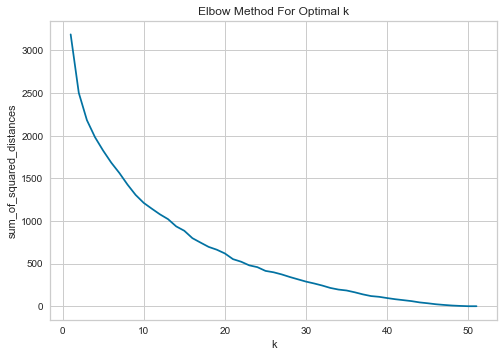

In [306]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

In [307]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,52)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(chicago_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(chicago_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (50) found smaller than n_clusters (51). Possibly due to duplicate points in X.
  


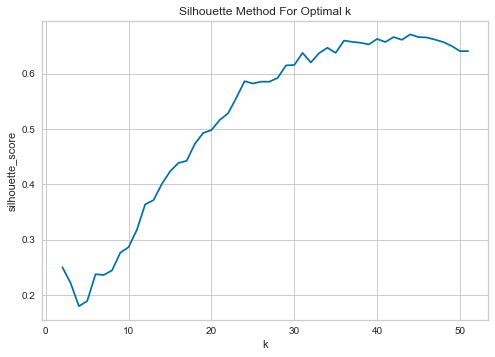

In [308]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

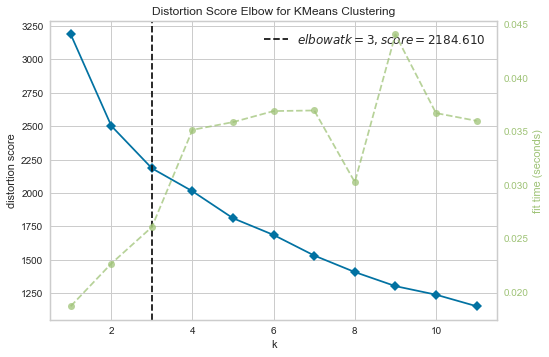

In [329]:
# !pip install yellowbrick
###### select K clusters
import yellowbrick.cluster
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


# KElbowVisual4ize
visualizer = KElbowVisualizer(kmeans, k=(1, 12), metric='distortion')
visualizer.fit(chicago_grouped_clustering)        
visualizer.show()

###### the cluster should be 3

In [310]:
# set number of clusters
kclusters = 3

chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1,).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_
#len(kmeans.labels_)#=16
chicago_merged = neighborhoods_venues_sorted

# add clustering labels
chicago_merged['Cluster Labels'] = kmeans.labels_

# merge chicago_grouped with chicago to add latitude/longitude for each neighborhood
chicago_merged = pd.merge(station_new, chicago_merged,left_on='Station',right_on='Neighborhood')
chicago_merged.groupby('Cluster Labels')['Station'].count()

Cluster Labels
0    23
1    18
2    48
Name: Station, dtype: int64

In [311]:
chicago_merged

Station   Lines                           Transfers  \
0            O'Hare    Blue  O'Hare: ATS Airport Transit System   
1          Rosemont    Blue                                   —   
2        Cumberland    Blue                                   —   
3    Jefferson Park    Blue                        Metra: UP-NW   
4           Belmont    Blue                                   —   
..              ...     ...                                 ...   
84             79th     Red                                   —   
85             87th     Red                                   —   
86    95th/Dan Ryan     Red                                   —   
87  Dempster–Skokie  Yellow                                   —   
88    Oakton–Skokie  Yellow                                   —   

          Location                  Opened          Structure   latitude  \
0           O'Hare   September 3, 1984[12]        Underground  41.973101   
1         Rosemont   February 27, 1983[13]  Expressway median  41.995343   
2           O'Hare   February 27, 1983[13]  Expressway median  41.973101   
3   Jefferson Park    February 1, 1970[14]  Expressway median  41.969738   
4         Avondale    February 1, 1970[14]        Underground  41.938921   
..             ...                     ...                ...        ...   
84         Chatham  September 28, 1969[68]  Expressway median  41.741145   
85         Chatham  September 28, 1969[68]  Expressway median  41.741145   
86        Roseland  September 28, 1969[68]  Expressway median  41.701979   
87          Skokie      March 28, 1925[69]           At-grade  42.301387   
88          Skokie      March 28, 1925[70]           At-grade  42.306497   

    longitude     Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  -87.906768           O'Hare           Coffee Shop           Snack Place   
1  -87.733745         Rosemont            Donut Shop           Coffee Shop   
2  -87.906768       Cumberland           Coffee Shop           Snack Place   
3  -87.763118   Jefferson Park           Pizza Place                Bakery   
4  -87.711168          Belmont                  Café           Coffee Shop   
..        ...              ...                   ...                   ...   
84 -87.612548             79th        Sandwich Place  Fast Food Restaurant   
85 -87.612548             87th        Sandwich Place  Fast Food Restaurant   
86 -87.625881    95th/Dan Ryan        Sandwich Place   Fried Chicken Joint   
87 -87.871313  Dempster–Skokie  Fast Food Restaurant   American Restaurant   
88 -87.872476    Oakton–Skokie  Fast Food Restaurant   American Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    American Restaurant              Tea Room    Seafood Restaurant   
1            Pizza Place        Sandwich Place  Fast Food Restaurant   
2    American Restaurant              Tea Room    Seafood Restaurant   
3            Coffee Shop   American Restaurant             BBQ Joint   
4    American Restaurant            Food Truck          Burger Joint   
..                   ...                   ...                   ...   
84    Seafood Restaurant            Donut Shop    African Restaurant   
85    Seafood Restaurant            Donut Shop    African Restaurant   
86  Fast Food Restaurant            Donut Shop           Pizza Place   
87        Sandwich Place            Donut Shop                 Diner   
88        Sandwich Place            Donut Shop   Fried Chicken Joint   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0             Bagel Shop             Gastropub  Fast Food Restaurant   
1                 Bakery          Burger Joint            Steakhouse   
2             Bagel Shop             Gastropub  Fast Food Restaurant   
3          Deli / Bodega                  Café  Fast Food Restaurant   
4                  Diner   Fried Chicken Joint             Gastropub   
..                   ...                   ...              

In [335]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[41.8781, -87.6298], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
color=['red','green','blue']


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['latitude'], chicago_merged['longitude'], chicago_merged['Neighborhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color[cluster-1],
        fill=True,
        fill_color=color[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [313]:
grouped = chicago_merged[['Neighborhood',
                     'Cluster Labels',
                     '1st Most Common Venue', 
                     '2nd Most Common Venue', 
                     '3rd Most Common Venue',
                     '4th Most Common Venue',
                     '5th Most Common Venue',
                    '6th Most Common Venue'
                    ]]

grouped.loc[:, 'Top Venues'] = grouped.apply(lambda x: ", ".join(x.iloc[2:5]), axis=1)
grouped = grouped.drop(['1st Most Common Venue', 
                        '2nd Most Common Venue', 
                        '3rd Most Common Venue',
                     '4th Most Common Venue',
                     '5th Most Common Venue','6th Most Common Venue'], axis=1)
def mix(group):
    return ', '.join(group['Top Venues'].tolist())
top_venues = grouped.groupby('Cluster Labels').apply(mix)

c0dist = grouped.groupby('Cluster Labels').get_group(0).shape[0]
clr0 = pd.Series(top_venues[0].split(', '), name='Cluster 0').value_counts().nlargest(6)/c0dist
c1dist = grouped.groupby('Cluster Labels').get_group(1).shape[0]
clr1 = pd.Series(top_venues[1].split(', '), name='Cluster 1').value_counts().nlargest(6)/c1dist
c2dist = grouped.groupby('Cluster Labels').get_group(2).shape[0]
clr2 = pd.Series(top_venues[2].split(', '), name='Cluster 2').value_counts().nlargest(6)/c2dist


/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

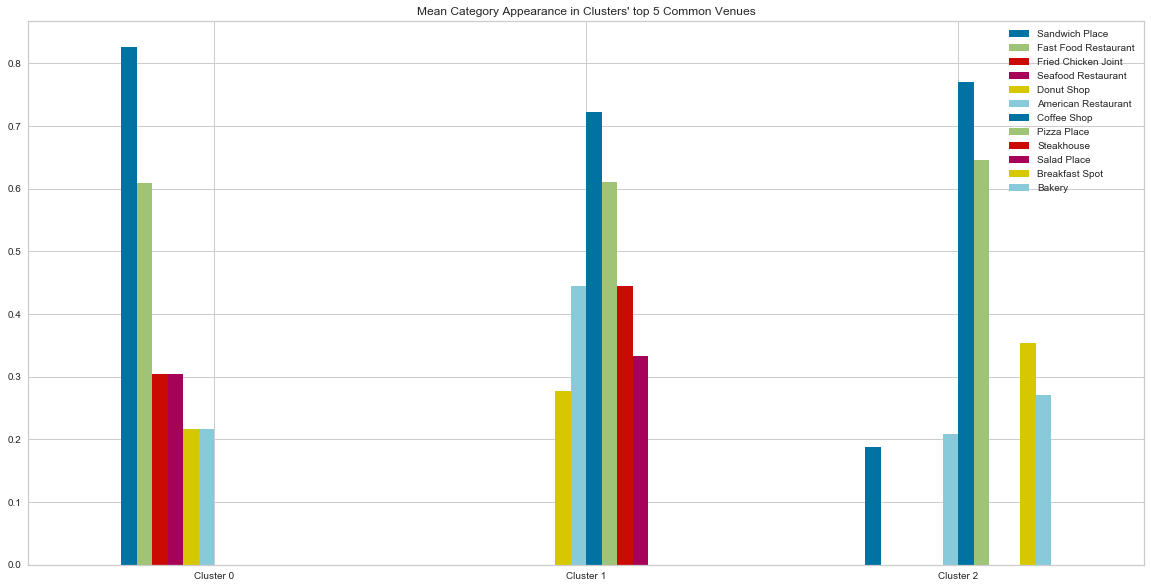

In [315]:
ax = pd.concat([clr0,clr1,clr2], sort=False, axis=1).transpose().plot(kind='bar', figsize=(20, 10))
plt.title("Mean Category Appearance in Clusters' top 5 Common Venues") 
plt.xticks(rotation=0)

In [317]:
chicago_merged = chicago_merged.drop(columns=['Lines','Transfers',"Opened", "Structure"],axis =1)

In [318]:
cluster_0 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[1:13]]
cluster_0 = cluster_0
cluster_0.head(5)

Location   latitude  longitude                     Neighborhood  \
1             Rosemont  41.995343 -87.733745                         Rosemont   
13  East Garfield Park  41.880866 -87.702833                     Kedzie–Homan   
14         Forest Park  41.727329 -87.616704                      Forest Park   
36              Austin  41.887876 -87.764851                          Laramie   
37  East Garfield Park  41.880866 -87.702833  Conservatory–Central Park Drive   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1             Donut Shop           Coffee Shop           Pizza Place   
13        Sandwich Place   American Restaurant  Fast Food Restaurant   
14  Fast Food Restaurant        Sandwich Place   Fried Chicken Joint   
36    Seafood Restaurant  Fast Food Restaurant        Sandwich Place   
37        Sandwich Place   American Restaurant  Fast Food Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1         Sandwich Place  Fast Food Restaurant                Bakery   
13   Fried Chicken Joint         Hot Dog Joint           Pizza Place   
14            Donut Shop   American Restaurant           Wings Joint   
36            Donut Shop   American Restaurant   Fried Chicken Joint   
37   Fried Chicken Joint         Hot Dog Joint           Pizza Place   

   7th Most Common Venue 8th Most Common Venue  
1           Burger Joint            Steakhouse  
13            Restaurant           Coffee Shop  
14           Coffee Shop                  Café  
36                  Café           Pizza Place  
37            Restaurant           Coffee Shop

In [337]:
required_column_indices = [1,5,6]
required_column = [list(chicago_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [1,5,6]

for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

East Garfield Park                   2
Skokie                               2
Grand Boulevard                      2
Chatham                              2
North Lawndale                       2
Englewood                            1
Greater Grand Crossing               1
Forest Park                          1
Austin                               1
Grand Boulevard / Washington Park    1
Cicero                               1
West Englewood                       1
Garfield Ridge                       1
Roseland                             1
Washington Park                      1
Rosemont                             1
Fuller Park                          1
McKinley Park                        1
Name: Location, dtype: int64
---------------------------------------------
Sandwich Place          10
Fast Food Restaurant     8
Donut Shop               2
Seafood Restaurant       1
American Restaurant      1
Pizza Place              1
Name: 1st Most Common Venue, dtype: int64
-------------------

In [338]:
cluster_1 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[1:16]]
cluster_1 = cluster_1
cluster_1.head(5)

Location   latitude  longitude  Neighborhood 1st Most Common Venue  \
0      O'Hare  41.973101 -87.906768        O'Hare           Coffee Shop   
2      O'Hare  41.973101 -87.906768    Cumberland           Coffee Shop   
7    The Loop  41.878884 -87.627181  Washington Ⓣ           Coffee Shop   
8    The Loop  41.878884 -87.627181       LaSalle           Coffee Shop   
10  Greektown  41.878445 -87.646932   UIC–Halsted   American Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0            Snack Place   American Restaurant              Tea Room   
2            Snack Place   American Restaurant              Tea Room   
7            Pizza Place           Salad Place  Caribbean Restaurant   
8            Pizza Place           Salad Place  Caribbean Restaurant   
10           Pizza Place            Restaurant           Coffee Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0     Seafood Restaurant            Bagel Shop             Gastropub   
2     Seafood Restaurant            Bagel Shop             Gastropub   
7    American Restaurant             Gastropub           Snack Place   
8    American Restaurant             Gastropub           Snack Place   
10         Deli / Bodega          Burger Joint            Donut Shop   

   8th Most Common Venue  Cluster Labels  
0   Fast Food Restaurant               1  
2   Fast Food Restaurant               1  
7         Breakfast Spot               1  
8         Breakfast Spot               1  
10             BBQ Joint               1

In [339]:
required_column_indices = [1,5,6]
required_column = [list(chicago_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [1,5,6]

for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

The Loop           10
Near North Side     3
O'Hare              2
Greektown           1
West Loop           1
Old Town            1
Name: Location, dtype: int64
---------------------------------------------
Coffee Shop            8
American Restaurant    5
Donut Shop             4
Steakhouse             1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place    11
Coffee Shop     5
Snack Place     2
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


In [340]:
cluster_2 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[1:16]]
cluster_2 = cluster_2
cluster_2.head(5)

Location   latitude  longitude    Neighborhood  \
3              Jefferson Park  41.969738 -87.763118  Jefferson Park   
4                    Avondale  41.938921 -87.711168         Belmont   
5                Logan Square  41.928568 -87.706793    Logan Square   
6  Wicker Park / Noble Square  41.905809 -87.672125        Division   
9              Near West Side  41.880066 -87.666762         Clinton   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
3           Pizza Place                Bakery           Coffee Shop   
4                  Café           Coffee Shop   American Restaurant   
5           Coffee Shop                  Café           Pizza Place   
6           Coffee Shop   American Restaurant           Pizza Place   
9           Pizza Place           Coffee Shop        Breakfast Spot   

       4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
3        American Restaurant             BBQ Joint         Deli / Bodega   
4                 Food Truck          Burger Joint                 Diner   
5        American Restaurant                Bakery  Fast Food Restaurant   
6  Cajun / Creole Restaurant        Breakfast Spot                  Café   
9             Sandwich Place            Restaurant         Deli / Bodega   

           7th Most Common Venue 8th Most Common Venue  Cluster Labels  
3                           Café  Fast Food Restaurant               2  
4            Fried Chicken Joint             Gastropub               2  
5  Vegetarian / Vegan Restaurant    Seafood Restaurant               2  
6       Mediterranean Restaurant    Falafel Restaurant               2  
9            American Restaurant                  Café               2

In [341]:
required_column_indices =  [1,5,6]
required_column = [list(chicago_merged.columns.values)[i] for i in required_column_indices]
required_column_indices =  [1,5,6]

for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Evanston                      6
Lake View                     4
Near West Side                4
Rogers Park                   4
Edgewater                     4
Lincoln Park                  3
Albany Park                   2
Uptown                        2
Woodlawn                      2
Jefferson Park                1
Logan Square                  1
Near South Side               1
Avondale                      1
Lincoln Square                1
South Loop                    1
Wicker Park / Noble Square    1
Illinois Medical District     1
Oak Park / Forest Park        1
Little Vietnam                1
Wilmette                      1
Roscoe Village                1
Bronzeville                   1
Pilsen                        1
Oak Park                      1
Armour Square                 1
Chinatown                     1
Name: Location, dtype: int64
---------------------------------------------
Pizza Place            19
Coffee Shop            18
Café                    5
American Restau